# PART 1

#### Libraries

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albayerga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:

from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import pandas as pd
import collections
from numpy import linalg as la
import matplotlib.pyplot as plt
import re


#### Load data into memory


In [7]:
docs_path = 'data/farmers-protest-tweets.json'

In [8]:
original_data_tweets = pd.read_json("data/farmers-protest-tweets.json.gz", lines=True, compression='gzip')
print("The number of tweets in the dataset is: ", len(original_data_tweets))

The number of tweets in the dataset is:  117407


In [9]:
original_data_tweets.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,0,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,0,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


#### Extract fields Tweet | Date | Hashtags| Likes | Retweets | Url


In [10]:
data_tweets = original_data_tweets
data_tweets.rename(columns={
    'content': 'Tweet',
    'date': 'Date',
    'likeCount': 'Likes',
    'retweetCount': 'Retweets',
    'url': 'Url',
    'lang': 'Language'
}, inplace=True)

data_tweets['Hashtags'] = data_tweets['Tweet'].apply(lambda x: [i for i in x.split() if i.startswith("#")]) # add a column for hashtags

data_tweets.head()

,Url,Date,Tweet,renderedContent,id,user,outlinks,tcooutlinks,replyCount,Retweets,...,conversationId,Language,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,Hashtags
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[#ModiDontSellFarmers, #FarmersProtest, #FreeN..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[#FarmersProtest, #ModiIgnoringFarmersDeaths, ..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None,[#FarmersProtest]
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[#farmersprotest, #NoFarmersNoFood]"
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None,"[#KisanEktaMorcha, #FarmersProtest, #NoFarmers..."


Example of tweet

In [11]:
for i in range(1):
    print(data_tweets.iloc[i]['Tweet'])


The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. 

@narendramodi @DelhiPolice Shame on you. 

#ModiDontSellFarmers 
#FarmersProtest 
#FreeNodeepKaur https://t.co/es3kn0IQAF


**tweet_document_ids_map**

In [12]:
tweet_document_ids_map =  pd.read_csv("data/tweet_document_ids_map.csv")

In [13]:
tweet_document_ids_map.head()

,docId,id
0,doc_0,1364506249291784198
1,doc_1,1364506237451313155
2,doc_2,1364506167226032128
3,doc_3,1364505991887347714
4,doc_4,1364505813834989568


In [14]:
document_id_map = dict(zip(tweet_document_ids_map['id'], tweet_document_ids_map['docId']))


#### Implement a language dictionary to process stop words depending on the language of the tweet

Given that we identified different languages among the tweets in the original data, we decided to apply stop words in the build_terms function according to their respective languages.

In [15]:
# these are the unique larnguages in the dataset
print(original_data_tweets['Language'].unique())

['en' 'pa' 'und' 'hi' 'ta' 'hu' 'ur' 'et' 'mr' 'tl' 'es' 'de' 'in' 'or'
 'kn' 'ml' 'ht' 'it' 'fr' 'bn' 'sv' 'tr' 'gu' 'te' 'da' 'pt' 'cs' 'sl'
 'nl' 'ca' 'no' 'cy' 'pl' 'eu' 'ne' 'ru' 'lv' 'lt' 'fi' 'ro' 'ar' 'fa'
 'vi' 'is' 'ja' 'si']


In [16]:
language_dict = {
    'ar': 'arabic',
    'eu': 'basque',
    'bn': 'bengali',
    'ca': 'catalan',
    'da': 'danish',
    'nl': 'dutch',
    'en': 'english',
    'fi': 'finnish',
    'fr': 'french',
    'de': 'german',
    'hu': 'hungarian',
    'in': 'indonesian',
    'it': 'italian',
    'ne': 'nepali',
    'no': 'norwegian',
    'pt': 'portuguese',
    'ro': 'romanian',
    'ru': 'russian',
    'es': 'spanish',
    'sv': 'swedish',
    'tr': 'turkish'
}

#### 1. Pre-process document

In [17]:
import string
def build_terms(line, lang):

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words(lang)) # get the stop words for the language

    line = re.sub(r'http\S+', '', line)
    words_line= line.split() # tokenize the text, get a list of terms

    #First we deal with # separation
    treated_words = []
    for word in words_line:

        if word and word[0] == "#":  #If its a hashtag
            separated_list = re.split(r'(?<=[a-z])(?=[A-Z])', word[1:])
            for separated_word in separated_list:
                treated_words.append(separated_word)
        else:
            treated_words.append(word)


    line = [word.lower() for word in treated_words] # everything to lowercase
    translator = str.maketrans('', '', string.punctuation)
    line = [word.translate(translator) for word in line]  # remove punctuation

    line= [word for word in line if word not in stop_words] # remove stop_words
    line= [stemmer.stem(word) for word in line ] # steam
    line = [word for word in line if word.isalnum()]  # keeps only words with alphanumeric characters

    return line

In [18]:
terms = build_terms("hello my #NameBrand is @john. I am a student, #student, ¢¢¢¢¢", 'english')
print(terms)

['hello', 'name', 'brand', 'john', 'student', 'student']


In [19]:
# input: dataset of tweets, output: preprocessed dataset of tweets
# output: dataframe for each tweet content - build terms (stop words depend on the language)
def preprocess_document(tweets):
    preprocessed_document = tweets.copy() # copy to avoid modifying the original dataset

    for i in range(len(preprocessed_document)):
        twt_content = preprocessed_document.iloc[i]['Tweet']

        if preprocessed_document.iloc[i]['Language'] in language_dict:
            lang = language_dict[preprocessed_document.iloc[i]['Language']]
        else:
            lang = 'english'

        preprocessed_document.at[i, 'Tweet'] = build_terms(twt_content, lang)


    preprocessed_document = preprocessed_document[['Tweet', 'Date', 'Hashtags', 'Likes', 'Retweets', 'Url']]

    return preprocessed_document


In [20]:
english_tweets_ids = data_tweets[data_tweets['Language'] == 'en']['id'].tolist()
print(english_tweets_ids)

[1364506249291784198, 1364506237451313155, 1364506167226032128, 1364505991887347714, 1364505813834989568, 1364505749359976448, 1364505676375076867, 1364505511073300481, 1364505452134817795, 1364505443997937669, 1364505314586951680, 1364505255946379268, 1364505170743238659, 1364505014530531330, 1364504850524995587, 1364504705460658179, 1364504358277308416, 1364504281618001921, 1364504256934408193, 1364503870651555840, 1364503539322671108, 1364503376885473282, 1364503314407124992, 1364503215232798721, 1364502921858211840, 1364502574280409091, 1364502520412930049, 1364502280167325699, 1364502000809824261, 1364501857788289027, 1364501716960354306, 1364500816418250752, 1364500655730274307, 1364500318420160513, 1364500256851951619, 1364500069945384961, 1364499897404190721, 1364499704147374082, 1364499669271855104, 1364499530515963905, 1364499513520525312, 1364499441927954434, 1364499308414967808, 1364498983813599235, 1364498954092642305, 1364498807157792770, 1364498674223513602, 136449864193

In [21]:
data_tweets = data_tweets[data_tweets['Language'] == 'en'].reset_index(drop=True)
data_tweets.head()
processed_tweets = preprocess_document(data_tweets)
processed_tweets.head()

,Tweet,Date,Hashtags,Likes,Retweets,Url
0,"[world, progress, indian, polic, govt, still, ...",2021-02-24 09:23:35+00:00,"[#ModiDontSellFarmers, #FarmersProtest, #FreeN...",0,0,https://twitter.com/ArjunSinghPanam/status/136...
1,"[farmer, protest, modi, ignor, farmer, death, ...",2021-02-24 09:23:32+00:00,"[#FarmersProtest, #ModiIgnoringFarmersDeaths, ...",0,0,https://twitter.com/PrdeepNain/status/13645062...
2,"[reallyswara, rohinisgh, watch, full, video, f...",2021-02-24 09:23:16+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
3,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:22:34+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
4,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:21:51+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...


#### 2. Exploratory data analysis

In [22]:
# input: dataset of tweets with the column 'Tweet' containing the preprocessed tweets
# output: list of lists of terms
def preprocess_tweets(lines):
      terms = []
      for line in lines:
         terms.append(line)
      return terms


In [23]:
all_tweets_in_terms = preprocess_tweets(processed_tweets['Tweet'])
print(all_tweets_in_terms[0])

['world', 'progress', 'indian', 'polic', 'govt', 'still', 'tri', 'take', 'india', 'back', 'horrif', 'past', 'tyranni', 'narendramodi', 'delhipolic', 'shame', 'modi', 'dont', 'sell', 'farmer', 'farmer', 'protest', 'free', 'nodeep', 'kaur']


Word counting distribution

In [24]:
def word_count_distribution(processed_tweets):
    all_words = [word for tweet in processed_tweets for word in tweet]
    word_count = collections.Counter(all_words)
    most_common_words = word_count.most_common(10)

    words, counts = zip(*most_common_words)
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.show()

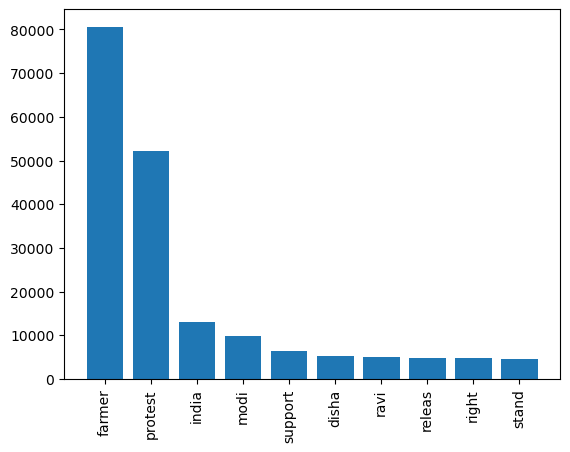

In [25]:
word_count_distribution(all_tweets_in_terms)

Average Sentence Length

In [26]:
def average_sentence_length(processed_tweets):
    lengths = [len(tweet) for tweet in processed_tweets]
    return sum(lengths) / len(lengths) if lengths else 0

In [27]:
average_sentence_length(all_tweets_in_terms)

16.673067789960562

Vocabulary size

In [28]:
def vocabulary_size(processed_terms):
    all_words = [word for tweet in processed_terms for word in tweet]
    return len(set(all_words))

In [29]:
vocabulary_size(all_tweets_in_terms)

36230

Ranking of the most retweeted tweets

In [30]:
def top_retweeted_tweets(data_tweets, top_n):
    # Sort by retweetCount in descending order and select the top N tweets
    top_retweets = data_tweets.sort_values(by='Retweets', ascending=False).head(top_n)
    
    # Extract relevant fields: content, retweet count, and tweet URL
    return top_retweets[['Tweet', 'Retweets', 'Url']]

In [31]:
top_retweeted_tweets(data_tweets, 10)

,Tweet,Retweets,Url
3203,There's a #FarmersProtest happening in Germany...,6164,https://twitter.com/dhruv_rathee/status/136414...
38410,"disha ravi, a 21-year-old climate activist, ha...",4673,https://twitter.com/rupikaur_/status/136088206...
38012,Disha Ravi broke down in court room and told j...,3742,https://twitter.com/amaanbali/status/136090860...
46206,Farmers are so sweet. Y’all have to see this @...,3332,https://twitter.com/jedijasmin_/status/1360162...
27071,india is targeting young women to silence diss...,3230,https://twitter.com/rupikaur_/status/136179092...
45142,Bollywood has betrayed Panjab &amp; the farmer...,3182,https://twitter.com/RaviSinghKA/status/1360260...
35993,"Please, where did you get your PhD from? Anti-...",2495,https://twitter.com/sushant_says/status/136103...
9846,This is Revolution. More than 2.25lac people a...,2258,https://twitter.com/amaanbali/status/136342152...
38262,Wish you fly over the Delhi border and look at...,2208,https://twitter.com/avinashkalla/status/136089...
41472,They went after our grandparents.\n#GurmukhSin...,1933,https://twitter.com/Monica_Gill1/status/136062...


Word Clouds for the Most Frequent Words

In [35]:
from wordcloud import WordCloud

def generate_word_clouds(all_tweets_in_terms):
    # Join all the tweets into a single string
    all_words = ' '.join([' '.join(tweet) for tweet in all_tweets_in_terms])
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()

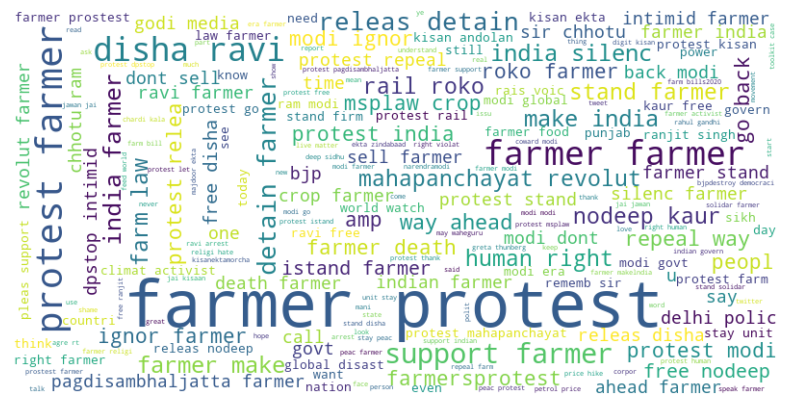

In [36]:
generate_word_clouds(all_tweets_in_terms)

Entity Recognition

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") #in case of not having it, download through command 'python -m spacy download en_core_web_sm'

In [ ]:
def entity_recognition(data_tweets, tweet_id):

    ner_categories = ["PERSON", "ORG", "GPE"]

    doc = nlp(data_tweets[tweet_id])
    
    entities = []
    
    for ent in doc.ents:
        if ent.label_ in ner_categories:
            entities.append((ent.text, ent.label_))
    
    for entity, category in entities:
        print(f"{entity}: {category}")
    
    spacy.displacy.render(doc, style="ent")


In [ ]:
entity_recognition(data_tweets['Tweet'], 0)

Govt: ORG
India: GPE


# PART 2

## Indexing

#### Build inverted index

The next step to build our search engine is to construct the inverted index using the TF-IDF algorithm. Initially, we implemented the **"create_index_tfidf"** function from a previous lab, but it was inefficient for larger datasets. We decided to optimize the code for better performance.

To address the performance issues, we restructured the function as follows:

In [38]:
from collections import defaultdict, Counter
from array import array
import numpy as np
import math


num_documents = len(document_id_map)

index = defaultdict(list)
tf = defaultdict(list)
df = defaultdict(int)
idf = defaultdict(float)

# Convert 'Tweet' column to a list of lists to speed up iteration
tweets = processed_tweets['Tweet'].tolist()

# Iterate over tweets and their document IDs
for i, tweet in enumerate(tweets):
    current_tweet_index = defaultdict(lambda: [document_id_map[english_tweets_ids[i]], array('I')])
    term_counts = Counter(tweet)  # Count term frequencies in the current tweet

    # Calculate normalized term frequencies and update current_tweet_index
    norm = math.sqrt(sum((count ** 2 for count in term_counts.values())))

    for position, term in enumerate(tweet):
        current_tweet_index[term][1].append(position)  # Store position for term

    for term, (doc_id, positions) in current_tweet_index.items():
        # Calculate term frequency (TF)
        tf_value = len(positions) / norm
        tf[term].append(np.round(tf_value, 4))

        # Update document frequency (DF)
        df[term] += 1

        # Update main index
        index[term].append([doc_id, positions])

# Calculate IDF for all terms
for term in df:
    idf[term] = np.round(np.log(float(num_documents) / df[term]), 4)


#### Ranking and search

In [39]:
#Represent the query as a weighted tf-idf vector
#Represent each document as a weighted tfidf vector
#Compute the cosine similarity score for the
#query vector and each document vector
#Rank documents with respect to the query by score
#Return the top K (e.g., K = 10) to the user

def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would become 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, doc_positions) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    #print(doc_scores)

    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [40]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query,'english')
    docs = set()
    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            if i == 0:
                docs = set(term_docs)
                i = 1
            #docs = docs intersection term_docs
            else: docs &= set(term_docs)

        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs = rank_documents(query, docs, index, idf, tf)

    #print( ranked_docs)
    return ranked_docs

#### Test queries

In [41]:
# define 5 queries to test the search engine
queries = [
    "Farmer protest",
    "Modi govt",
    "diesel price",
    "indian farmer",
    "Disha ravi"
]

In [42]:
inverse_document_id_map = dict(zip(tweet_document_ids_map['docId'], tweet_document_ids_map['id']))

In [82]:
all_ranked_docs = []

for query in queries:
    print(f"\nProcessing query: '{query}'")
    ranked_docs = search_tf_idf(query, index)

    top = 10

    print(f"Top {top} docs ids for query: '{query}'")
    for d_id in ranked_docs[:top]:
        print("doc_id= {}".format(d_id))

    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
    indices = data_tweets[data_tweets['id'].isin(original_ids)].index
    tweets_finales = processed_tweets.iloc[indices]

    all_ranked_docs.append((query, tweets_finales))


    print(f"Docs info for query '{query}':")

    display(tweets_finales)



Processing query: 'Farmer protest'
Top 10 docs ids for query: 'Farmer protest'
doc_id= doc_32542
doc_id= doc_22865
doc_id= doc_7859
doc_id= doc_6060
doc_id= doc_5727
doc_id= doc_5183
doc_id= doc_46137
doc_id= doc_45189
doc_id= doc_43199
doc_id= doc_42188
Docs info for query 'Farmer protest':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5183,"[farmer, protest]",2021-02-22 22:32:21+00:00,[#FarmersProtest],0,1,https://twitter.com/Rajnika78115125/status/136...
5727,"[farmer, protest, farmer, protest]",2021-02-22 16:13:08+00:00,"[#MSP_किसान_का_हक, #FarmersProtest]",0,0,https://twitter.com/JSekhupuria/status/1363884...
6060,"[farmer, protest]",2021-02-22 12:50:47+00:00,[#FarmersProtest],1,0,https://twitter.com/rwhrao_singh/status/136383...
7859,"[farmer, protest, farmer, protest]",2021-02-22 02:00:20+00:00,"[#FarmersProtests, #FarmersProtest]",0,0,https://twitter.com/Rajnika78115125/status/136...
22865,"[largest, protest, kanganateam, farmer, protes...",2021-02-17 18:28:33+00:00,"[#FarmersProtest, #FarmersProtest, #FarmersPro...",0,0,https://twitter.com/karm16200070/status/136210...
32542,"[timesnow, farmer, protest, protest, protest]",2021-02-15 14:12:46+00:00,[#FarmersProtest],0,0,https://twitter.com/45kHz/status/1361317533173...
42188,"[farmer, protest]",2021-02-13 11:18:49+00:00,[#FarmersProtest],0,0,https://twitter.com/khairaBet/status/136054898...
43199,"[farmer, protest]",2021-02-13 05:07:42+00:00,[#FarmersProtest],1,0,https://twitter.com/tash_kmb/status/1360455587...
45189,"[farmer, protest]",2021-02-12 15:58:08+00:00,[#FarmersProtest],3,1,https://twitter.com/Manpree52519810/status/136...
46137,"[farmer, protest]",2021-02-12 10:08:02+00:00,[#FarmersProtest],1,1,https://twitter.com/Parikau16692134/status/136...



Processing query: 'Modi govt'
Top 10 docs ids for query: 'Modi govt'
doc_id= doc_30979
doc_id= doc_32524
doc_id= doc_32236
doc_id= doc_4021
doc_id= doc_31725
doc_id= doc_32016
doc_id= doc_35049
doc_id= doc_32570
doc_id= doc_30292
doc_id= doc_28222
Docs info for query 'Modi govt':


,Tweet,Date,Hashtags,Likes,Retweets,Url
4021,"[think, modi, govt, wors, british, govt, pagdi...",2021-02-23 04:33:50+00:00,"[#Pagdi_Sambhal_Jatta, #FarmersProtest]",0,0,https://twitter.com/777sattiSingh/status/13640...
28222,"[farmer, protest, india, domest, affairsupport...",2021-02-16 15:13:34+00:00,"[#FarmersProtest, #ToolkitCase]",0,0,https://twitter.com/umakantsingh_IN/status/136...
30292,"[shame, india, govt, modi, fuel, scam, iam, mo...",2021-02-16 04:12:17+00:00,"[#ModiFuelScam, #IamAgainstModiGovt, #PetrolDi...",4,7,https://twitter.com/nishamirok/status/13615288...
30979,"[govt, dictatorship, iam, modi, govt, farmer, ...",2021-02-16 01:03:08+00:00,"[#IamAgainstModiGovt, #FarmersProtest]",0,0,https://twitter.com/Sahibpreet1111/status/1361...
31725,"[govt, go, dilut, polic, total, salwa, judum, ...",2021-02-15 18:39:34+00:00,"[#farmers!, #IamAgainstModiGovt, #FarmersProtest]",0,1,https://twitter.com/umakantsingh_IN/status/136...
32016,"[strictli, condemn, unlaw, action, modi, govt,...",2021-02-15 16:45:03+00:00,"[#FarmersProtest, #IamAgainstModiGovt]",2,0,https://twitter.com/AmrinderS_13/status/136135...
32236,"[shame, india, govt, iam, modi, govt, farmer, ...",2021-02-15 15:42:31+00:00,"[#IndiaGovt., #IamAgainstModiGovt, #FarmersPro...",0,0,https://twitter.com/legendjatt007/status/13613...
32524,"[im, modi, govt, india, threat, undeclar, emer...",2021-02-15 14:18:51+00:00,"[#IamAgainstModiGovt, #farmersprotest]",8,13,https://twitter.com/PrinceR98409311/status/136...
32570,"[world, modi, govt, hate, passion, sing, song,...",2021-02-15 14:01:51+00:00,"[#FarmersProtest, #IamAgainstModiGovt]",66,56,https://twitter.com/iMani_KaurRai/status/13613...
35049,"[shame, act, modi, govt, india, silenc, farmer...",2021-02-15 02:46:08+00:00,"[#IndiaBeingSilenced, #FarmersProtest, #ShameO...",0,1,https://twitter.com/JSMaan18/status/1361144734...



Processing query: 'diesel price'
Top 10 docs ids for query: 'diesel price'
doc_id= doc_12933
doc_id= doc_28458
doc_id= doc_20756
doc_id= doc_27520
doc_id= doc_27290
doc_id= doc_12511
doc_id= doc_12825
doc_id= doc_29721
doc_id= doc_28119
doc_id= doc_41265
Docs info for query 'diesel price':


,Tweet,Date,Hashtags,Likes,Retweets,Url
12511,"[myogiadityanath, takefarmlawsback, farmerspro...",2021-02-20 12:05:50+00:00,"[#takefarmlawsback, #farmersprotest, #standwit...",0,0,https://twitter.com/chahalcs28/status/13630975...
12825,"[thursday, went, past, mark, madhya, pradesh, ...",2021-02-20 10:05:21+00:00,"[#PetrolDieselPriceHike, #PetrolPrice, #Petrol...",1,1,https://twitter.com/abuzargaffarisr/status/136...
12933,"[bjp, rule, state, better, control, price, pet...",2021-02-20 09:12:34+00:00,"[#BJP, #Petrol, #Diesel, #ModiHaiToMehngaiHai,...",2,0,https://twitter.com/suneet7954/status/13630539...
20756,"[month, farmer, protest, peopl, petrol100, pro...",2021-02-18 07:10:45+00:00,"[#FarmersProtest, #petrol100, #BJP, #Days, #di...",2,0,https://twitter.com/RishabRath/status/13622984...
27290,"[ashey, din, petrol, diesel, price, hike, farm...",2021-02-16 20:01:20+00:00,"[#PetrolDieselPriceHike, #FarmersProtest]",1,0,https://twitter.com/Majhakisansang1/status/136...
27520,"[farmer, protest, petrol, diesel, price, hike]",2021-02-16 18:46:37+00:00,"[#FarmersProtest, #PetrolDieselPriceHike]",0,0,https://twitter.com/sangharusski/status/136174...
28119,"[godi, media, explain, petrol, diesel, price, ...",2021-02-16 15:49:47+00:00,"[#Godi, #Explained:, #Petrol,, #Diesel, #Modi,...",0,0,https://twitter.com/Shahidlived/status/1361704...
28458,"[petrol, diesel, price, hike, diesel, also, sc...",2021-02-16 13:53:04+00:00,"[#PetrolDieselPriceHike, ##FarmersProtest, #Pe...",2,0,https://twitter.com/ranjit1442/status/13616749...
29721,"[andhbhakt, like, petrol, price, hike, petrol,...",2021-02-16 06:16:40+00:00,"[#Andhbhakts, #PetrolPriceHike, #PetrolDieselP...",0,0,https://twitter.com/Gurjot20523956/status/1361...
41265,"[give, best, price, petrol, diesel, go, back, ...",2021-02-13 16:58:09+00:00,"[#GoBackModi, #FarmersProtest]",3,2,https://twitter.com/dinumeena73/status/1360634...



Processing query: 'indian farmer'
Top 10 docs ids for query: 'indian farmer'
doc_id= doc_30112
doc_id= doc_5374
doc_id= doc_9022
doc_id= doc_34729
doc_id= doc_30122
doc_id= doc_31839
doc_id= doc_12469
doc_id= doc_17156
doc_id= doc_40010
doc_id= doc_44653
Docs info for query 'indian farmer':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5374,"[vp, dear, madam, indian, farmer, need, justic...",2021-02-22 20:12:48+00:00,[#FarmersProtest],0,0,https://twitter.com/Amandeepjohal11/status/136...
9022,"[modirojgardo, indian, youth, farmer, protest,...",2021-02-21 16:14:23+00:00,"[#modi_rojgar_do, #FarmersProtest-, #Petrol100...",2,0,https://twitter.com/Roshan575002/status/136352...
12469,"[indian, cricket, son, got, msp, mumbai, india...",2021-02-20 12:21:15+00:00,"[#MSP, #MumbaiIndians, #IPLAuctions2021, #Tool...",0,0,https://twitter.com/dapinder_brar/status/13631...
17156,"[indian, daughter, support, farmer, protest, c...",2021-02-19 07:56:29+00:00,[#FarmersProtest],0,1,https://twitter.com/karim_mewati/status/136267...
30112,"[themanikgoyalb, indian, govt, indian, system,...",2021-02-16 04:49:51+00:00,[#FarmersProtest],1,0,https://twitter.com/iRavinderSG/status/1361538...
30122,"[indian, govt, indian, system, farmer, protest...",2021-02-16 04:48:26+00:00,"[#FarmersProtest, #ReleaseDetainedFarmersAndAc...",3,0,https://twitter.com/iRavinderSG/status/1361537...
31839,"[disha, ravi, jail, indian, activist, link, gr...",2021-02-15 17:49:00+00:00,"[#FarmersProtest, #IndianInjustice]",41,14,https://twitter.com/UK51NGH/status/13613719494...
34729,"[indian, farmer, protest, matter, british, ind...",2021-02-15 04:00:26+00:00,[#FarmersProtest],2,1,https://twitter.com/manjitghuman58/status/1361...
40010,"[nandini, actorsiddharth, buy, decid, priceamb...",2021-02-13 22:45:35+00:00,[#FarmersProtest],0,0,https://twitter.com/Kamalpr70500608/status/136...
44653,"[think, indian, farmer, today, indian, farmer,...",2021-02-12 18:19:26+00:00,[#FarmersProtest],1,0,https://twitter.com/bishbishN/status/136029244...



Processing query: 'Disha ravi'
Top 10 docs ids for query: 'Disha ravi'
doc_id= doc_24045
doc_id= doc_28075
doc_id= doc_35524
doc_id= doc_35520
doc_id= doc_32720
doc_id= doc_36598
doc_id= doc_34540
doc_id= doc_24250
doc_id= doc_8824
doc_id= doc_36243
Docs info for query 'Disha ravi':


,Tweet,Date,Hashtags,Likes,Retweets,Url
8824,"[proud, disha, ravi, free, disha, ravi, farmer...",2021-02-21 17:11:55+00:00,"[#DishaRavi, #FreeDishaRavi, #FarmersProtest]",0,0,https://twitter.com/Me13015931/status/13635369...
24045,"[releasedisha, releas, disha, ravi, disha, rav...",2021-02-17 10:25:41+00:00,"[#releasedisha, #ReleaseDishaRavi, #DishaRavi,...",2,1,https://twitter.com/nikysaji/status/1361985162...
24250,"[rais, voic, disha, ravi, disha, ravi, arrest,...",2021-02-17 08:54:23+00:00,"[#DishaRaviArrest, #DishaRaviArrested, #Disha_...",3,1,https://twitter.com/ImAliQureshi/status/136196...
28075,"[farmer, protest, disha, ravi, disha, ravi, ar...",2021-02-16 16:01:37+00:00,"[#FarmersProtest, #DishaRavi, #DishaRaviArrest...",0,1,https://twitter.com/actuallyshivom/status/1361...
32720,"[dictatorship, farmersprotest, releas, disha, ...",2021-02-15 13:01:03+00:00,"[#Farmersprotest, #ReleaseDishaRavi, #DishaRavi]",4,0,https://twitter.com/aakash_du/status/136129948...
34540,"[disha, ravi, arrest, support, farmer, protest...",2021-02-15 04:34:54+00:00,"[#DishaRaviArrested, #FarmersProtest, #Release...",0,0,https://twitter.com/bijoshpv/status/1361172109...
35520,"[releas, disha, ravi, disha, ravi, farmer, pro...",2021-02-15 00:08:20+00:00,"[#शहीद_जवान_शहीद_किसान, #DishaRavi, #FarmersPr...",1,1,https://twitter.com/Baldev52633391/status/1361...
35524,"[stand, disha, ravi, disha, ravi, farmer, prot...",2021-02-15 00:04:36+00:00,"[#DishaRavi, #FarmersProtest]",1,0,https://twitter.com/Baldev52633391/status/1361...
36243,"[releas, disha, ravi, justic, disha, ravi, far...",2021-02-14 18:12:01+00:00,"[#ReleaseDishaRavi, #FarmersProtest]",1,0,https://twitter.com/MaanDee08215437/status/136...
36598,"[arrest, disha, ravi, cowardli, releas, disha,...",2021-02-14 16:44:42+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FreeDishaRavi...",0,0,https://twitter.com/MannnatKaur/status/1360993...


## Evaluation

Load evaluation.csv and Parse the Ground Truth:

In [44]:
evaluation_df = pd.read_csv("data/evaluation.csv", sep=";")
evaluation_df.head()

,docId,query_id,label
0,doc_156,1.0,0.0
1,doc_1039,1.0,0.0
2,doc_1047,1.0,1.0
3,doc_1685,1.0,0.0
4,doc_2100,1.0,1.0


In [45]:
print_result = evaluation_df["label"].unique() # label is doc_score (1 or 0)
print_result = [x for x in print_result if str(x) != 'nan'] #last row is extra, does not contain anything
print("The ground truth of our dataset is composed of {} Relevance labels: {}".format(len(print_result), sorted(print_result)))

The ground truth of our dataset is composed of 2 Relevance labels: [0.0, 1.0]


In [46]:
query_1_docs = evaluation_df[evaluation_df['query_id'] == 1.0]
query_2_docs = evaluation_df[evaluation_df['query_id'] == 2.0]


In [47]:
test_queries = {
    1: "people's rights",
    2: "Indian Government"
}

In [64]:
relevant_docs_query_1 = set(query_1_docs[query_1_docs['label'] == 1.0]['docId'].values)

retrieved_docs_query_1 = search_tf_idf(test_queries[1], index)

retrieved_docs_query_1_filtered = set([doc for doc in retrieved_docs_query_1 if doc in query_1_docs['docId'].values])

relevant_retrieved_docs = retrieved_docs_query_1_filtered.intersection(relevant_docs_query_1)

print("Relevant retrieved docs:", len(relevant_retrieved_docs))
print("Relevant not retrieved docs:", len(relevant_docs_query_1 - relevant_retrieved_docs))
print("Retrieved not relevant docs:", len(retrieved_docs_query_1_filtered - relevant_retrieved_docs))

precision= len(relevant_retrieved_docs) / len(retrieved_docs_query_1_filtered)
print("Precision:", precision)

recall = len(relevant_retrieved_docs) / len(relevant_docs_query_1)
print("Recall:", recall)

Relevant retrieved docs: 14
Relevant not retrieved docs: 1
Retrieved not relevant docs: 7
Precision: 0.6666666666666666
Recall: 0.9333333333333333


In [65]:
relevant_docs_query_2 = set(query_2_docs[query_2_docs['label'] == 1.0]['docId'].values)

retrieved_docs_query_2 = search_tf_idf(test_queries[2], index)

retrieved_docs_query_2_filtered = set([doc for doc in retrieved_docs_query_2 if doc in query_2_docs['docId'].values])

relevant_retrieved_docs = retrieved_docs_query_2_filtered.intersection(relevant_docs_query_2)

print("Relevant retrieved docs:", len(relevant_retrieved_docs))
print("Relevant not retrieved docs:", len(relevant_docs_query_2 - relevant_retrieved_docs))
print("Retrieved not relevant docs:", len(retrieved_docs_query_2_filtered - relevant_retrieved_docs))

precision = len(relevant_retrieved_docs) / len(retrieved_docs_query_2_filtered)
print("Precision for query 2:", precision)

recall = len(relevant_retrieved_docs) / len(relevant_docs_query_2) if len(relevant_docs_query_2) > 0 else 0
print("Recall for query 2:", recall)

Relevant retrieved docs: 14
Relevant not retrieved docs: 1
Retrieved not relevant docs: 0
Precision for query 2: 1.0
Recall for query 2: 0.9333333333333333


#### Precioson@K (P@K)

In [66]:
def precision_at_k(relevant_docs, retrieved_docs, k):
    top_k_docs = list(retrieved_docs)[:k]
    relevant_docs_in_top_k = sum(1 for doc in top_k_docs if doc in relevant_docs)
    precision = relevant_docs_in_top_k / k
    return precision

In [68]:
precision_at_5_query_1 = precision_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Precision@5 for query 1:", precision_at_5_query_1)

precision_at_5_query_2 = precision_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Precision@5 for query 2:", precision_at_5_query_2)

Precision@5 for query 1: 0.6
Precision@5 for query 2: 1.0


#### Recall@K (R@K)

In [69]:
def recall_at_k(relevant_docs, retrieved_docs, k):
    top_k_docs = list(retrieved_docs)[:k]
    relevant_docs_in_top_k = sum(1 for doc in top_k_docs if doc in relevant_docs)
    recall = relevant_docs_in_top_k / len(relevant_docs)
    return recall

In [70]:
recall_at_5_query_1 = recall_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Recall@5 for query 1:", recall_at_5_query_1)

recall_at_5_query_2 = recall_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Recall@5 for query 2:", recall_at_5_query_2)

Recall@5 for query 1: 0.2
Recall@5 for query 2: 0.3333333333333333


#### Average Precision@K

In [72]:
def average_precision_at_k(relevant_docs, retrieved_docs, k):
    retrieved_docs = list(retrieved_docs)

    precision_sum = 0.0
    relevant_count = 0

    # iterate through the top k retrieved documents
    for i in range(min(k, len(retrieved_docs))):
        if retrieved_docs[i] in relevant_docs:
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)  # i + 1 because index is 0-based
            precision_sum += precision_at_i

    # calculate average precision
    if relevant_count > 0:
        average_precision = precision_sum / relevant_count
    else:
        average_precision = 0.0

    return average_precision

In [73]:
average_precision_at_5_query_1 = average_precision_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Average Precision@5 for query 1:", average_precision_at_5_query_1)

average_precision_at_5_query_2 = average_precision_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Average Precision@5 for query 2:", average_precision_at_5_query_2)

Average Precision@5 for query 1: 0.4777777777777777
Average Precision@5 for query 2: 1.0


#### F1-Score@K

In [74]:
def f1_score_at_k(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [75]:
f1_score_at_5_query_1 = f1_score_at_k(precision_at_5_query_1, recall_at_5_query_1)
print("F1 Score@5 for query 1:", f1_score_at_5_query_1)

f1_score_at_5_query_2 = f1_score_at_k(precision_at_5_query_2, recall_at_5_query_2)
print("F1 Score@5 for query 2:", f1_score_at_5_query_2)

F1 Score@5 for query 1: 0.3
F1 Score@5 for query 2: 0.5


#### Mean Average Precision (MAP)

In [76]:
def mean_average_precision(queries, relevant_docs_dict, retrieved_docs_dict, k):
    average_precisions = []

    for query in queries:
        relevant_docs = relevant_docs_dict.get(query, set())
        retrieved_docs = retrieved_docs_dict.get(query, [])

        avg_precision = average_precision_at_k(relevant_docs, retrieved_docs, k)
        average_precisions.append(avg_precision)

    # calculate MAP
    mean_avg_precision = sum(average_precisions) / len(average_precisions) if average_precisions else 0.0

    return mean_avg_precision

In [77]:
relevant_docs_dict = {
    1: relevant_docs_query_1,
    2: relevant_docs_query_2
}

retrieved_docs_dict = {
    1: retrieved_docs_query_1_filtered,
    2: retrieved_docs_query_2_filtered
}

map_5 = mean_average_precision(test_queries.keys(), relevant_docs_dict, retrieved_docs_dict, 5)
print("MAP@5 for the test queries:", map_5)

MAP@5 for the test queries: 0.7388888888888888


#### Mean Reciprocal Rank (MRR)

In [78]:
def reciprocal_rank(queries, relevant_docs_dict, retrieved_docs_dict):
    reciprocal_ranks = []

    for query in queries:
        relevant_docs = relevant_docs_dict.get(query, set())
        retrieved_docs = retrieved_docs_dict.get(query, [])

        # find the rank of the first relevant document
        for rank, doc in enumerate(retrieved_docs, start=1):
            if doc in relevant_docs:
                reciprocal_ranks.append(1 / rank)
                break
        else:
            reciprocal_ranks.append(0)

    # calculate MRR
    mean_reciprocal_rank_value = sum(reciprocal_ranks) / len(reciprocal_ranks) if reciprocal_ranks else 0.0

    return mean_reciprocal_rank_value


In [79]:
mrr = reciprocal_rank(test_queries.keys(), relevant_docs_dict, retrieved_docs_dict)
print("MRR for the test queries:", mrr)

MRR for the test queries: 0.6666666666666666


#### Normalized Discounted Cumulative Gain (NDCG)

In [80]:
def dcg(relevance_scores):
    return sum(relevance / np.log2(idx + 1) for idx, relevance in enumerate(relevance_scores, start=1))

def ndcg(relevant_docs, retrieved_docs):
    sorted_relevant_docs = sorted(relevant_docs, key=lambda x: x[1], reverse=True)

    # create relevance scores for the retrieved documents
    relevance_scores = [0] * len(retrieved_docs)
    for idx, doc_id in enumerate(retrieved_docs):
        for relevant_doc in sorted_relevant_docs:
            if doc_id == relevant_doc[0]:
                relevance_scores[idx] = relevant_doc[1]  # set the relevance score for this doc
                break

    # calculate DCG for retrieved documents
    dcg_score = dcg(relevance_scores)

    # calculate IDCG for ideal ranking
    ideal_relevance_scores = [relevance for _, relevance in sorted_relevant_docs]
    idcg_score = dcg(ideal_relevance_scores)

    # calculate NDCG
    ndcg_score = dcg_score / idcg_score if idcg_score > 0 else 0.0

    return ndcg_score

In [81]:
ndcg_query_1 = ndcg([(doc, 1) for doc in relevant_docs_query_1], retrieved_docs_query_1_filtered)
print("NDCG for query 1:", ndcg_query_1)

ndcg_query_2 = ndcg([(doc, 1) for doc in relevant_docs_query_2], retrieved_docs_query_2_filtered)
print("NDCG for query 2:", ndcg_query_2)

NDCG for query 1: 0.7379566858492768
NDCG for query 2: 0.9573476954303488


Evaluating our queries

For timing we have chosen our query to be is india being silenced? and we have considered relevant those with the hashtag:

In [ ]:
filtered_docs = processed_tweets[processed_tweets['Hashtags'].apply(lambda x: '#IndiaBeingSilenced' in x)]
indices_list = filtered_docs.index.tolist()
ground_truth_tweet_ids = [english_tweets_ids[i] for i in indices_list]
ground_truth_doc_ids = [document_id_map[tweet_id] for tweet_id in ground_truth_tweet_ids if tweet_id in document_id_map]


['doc_394', 'doc_438', 'doc_1259', 'doc_1775', 'doc_1787', 'doc_2020', 'doc_2050', 'doc_2415', 'doc_2420', 'doc_2433', 'doc_2523', 'doc_2651', 'doc_2653', 'doc_2764', 'doc_4141', 'doc_4249', 'doc_4277', 'doc_4799', 'doc_5149', 'doc_5301', 'doc_5453', 'doc_5796', 'doc_5816', 'doc_8207', 'doc_8411', 'doc_8575', 'doc_8694', 'doc_8791', 'doc_8841', 'doc_9111', 'doc_9928', 'doc_10016', 'doc_10029', 'doc_10156', 'doc_10372', 'doc_10571', 'doc_11142', 'doc_11197', 'doc_11247', 'doc_11283', 'doc_11877', 'doc_12308', 'doc_12962', 'doc_13150', 'doc_13430', 'doc_13503', 'doc_13568', 'doc_13642', 'doc_13730', 'doc_13735', 'doc_13965', 'doc_14038', 'doc_14083', 'doc_14124', 'doc_15065', 'doc_15066', 'doc_15267', 'doc_15800', 'doc_15853', 'doc_15894', 'doc_15983', 'doc_16219', 'doc_16223', 'doc_16228', 'doc_16646', 'doc_17005', 'doc_17035', 'doc_17071', 'doc_17110', 'doc_17220', 'doc_17244', 'doc_17259', 'doc_17266', 'doc_17349', 'doc_17775', 'doc_17781', 'doc_18035', 'doc_18550', 'doc_18614', 'doc_

In [ ]:
q = "india silenced"

# Realiza la búsqueda utilizando TF-IDF
retrieved_docs = search_tf_idf(q, index)

In [ ]:
retrieved_docs_set = set(retrieved_docs)

relevant_retrieved_docs = retrieved_docs_set.intersection(set(ground_truth_doc_ids))

precision = len(relevant_retrieved_docs) / len(retrieved_docs_set)
print("Precision:", precision)

recall = len(relevant_retrieved_docs) / len(ground_truth_doc_ids)
print("Recall:", recall)


Precision: 0.9553695955369595
Recall: 1.0


### TNSE

In [ ]:

data = processed_tweets['Tweet']
print(data)

In [ ]:
from gensim.models import Word2Vec
import multiprocessing

data = processed_tweets['Tweet']
print(data)
model = Word2Vec(data, window=5, min_count=5, workers=multiprocessing.cpu_count())

words=list(model.wv.index_to_key)
print(words)

print(model.wv['farmer'])

Example of the encoded vector for the word 'farmer':

In [86]:
print(model.wv['farmer'])

[-1.17263770e+00  2.07842141e-01  1.13060606e+00  5.02978146e-01
  1.02031553e+00 -5.89056909e-01  4.44344521e-01  2.95500696e-01
 -2.99503654e-01 -7.91035414e-01  1.24350488e+00  4.53861117e-01
 -1.98880926e-01 -6.37334406e-01 -3.13945651e-01 -1.12509072e+00
  9.46911514e-01  1.87278211e-01  1.61291897e-01 -2.11335689e-01
  6.14047647e-01 -2.32102256e-02  3.56111318e-01  6.24194026e-01
 -5.27112544e-01  5.03817081e-01 -6.28264487e-01 -2.16122672e-01
  2.19416127e-01 -2.24811777e-01 -3.17309290e-01 -5.35369694e-01
 -7.26987600e-01  5.02654672e-01  2.50413090e-01  3.38541061e-01
  9.25279737e-01  4.87412401e-02  5.86227477e-01  1.02244115e+00
 -8.41576159e-01  7.97951639e-01 -1.23283625e+00 -1.85116783e-01
 -8.32326055e-01 -7.11878121e-01 -4.97147739e-01  1.05157532e-01
  9.13456976e-01 -1.31487355e-01 -1.04411906e-02  1.22645438e+00
  9.58939314e-01  8.81097317e-02  3.02572757e-01  1.73279771e-03
  1.24390006e-01  5.65855145e-01  1.84318483e-01  1.24298012e+00
 -7.71059513e-01  3.87500

In [87]:
words_ak = []
embeddings_ak = []

for word in words:
    embeddings_ak.append(model.wv[word])
    words_ak.append(word)

#print(embeddings_ak)
#print(words_ak)

In [ ]:
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)

In [ ]:
word_vectors = model.wv  # Accede a los vectores de Word2Vec
X = np.array([word_vectors[word] for word in model.wv.index_to_key])

In [ ]:
embeddings_ak_2d = tsne_2d.fit_transform(X)

C:\Users\Sallo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


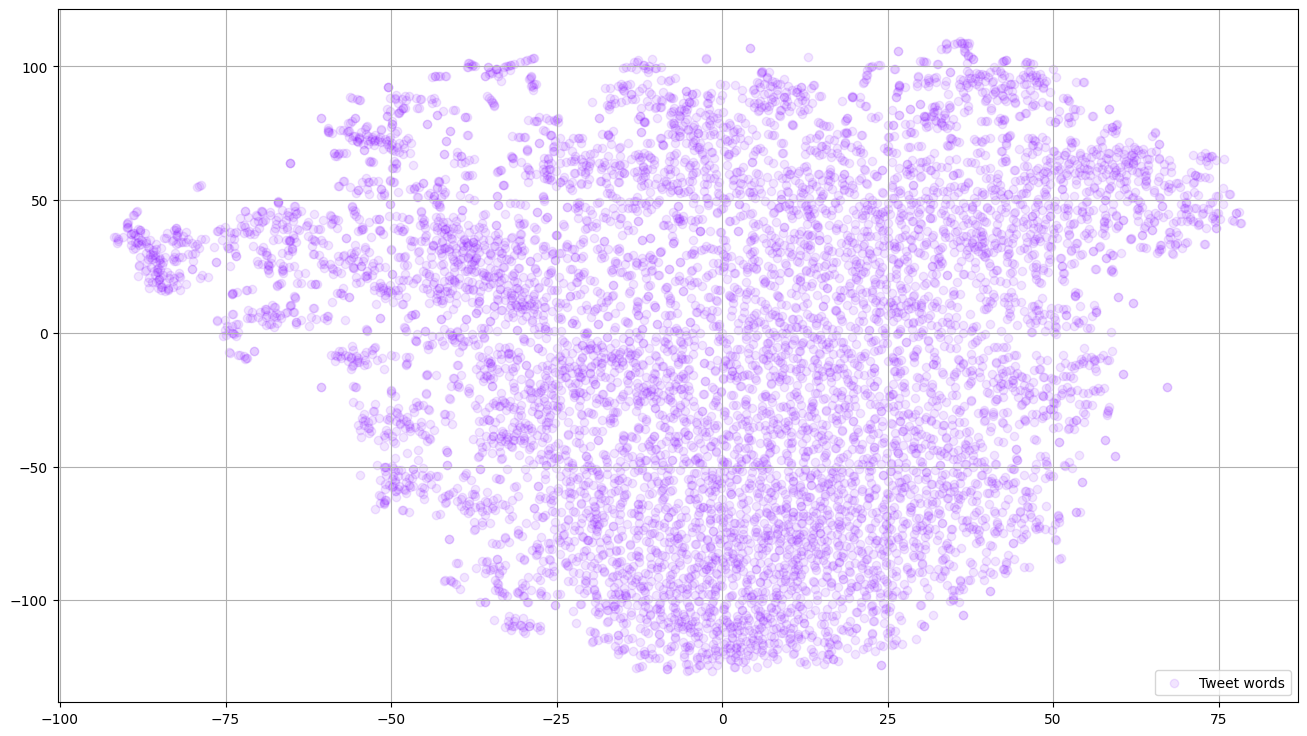

In [ ]:



def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Tweet words', embeddings_ak_2d, a=0.1)